In [66]:
from zipfile import ZipFile
import os
import json

In [67]:
### Extract Dataset 

In [68]:
from zipfile import ZipFile
import os

# store dataset zip file path and extract directory
zip_file_path = 'women-fashion.zip'
extraction_directory = '/women_fashion/'

#if extraction directory does not exists, the directory is created using os.makedirs()
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

# zip file is opened in read mode using Python's ZipFile and its contents are extracted
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [46]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

['/women_fashion/women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', '/women_fashion/women fashion\\Anarkali suit with a modern twist.jpg', '/women_fashion/women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', '/women_fashion/women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', '/women_fashion/women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', '/women_fashion/women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', '/women_fashion/women fashion\\ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', '/women_fashion/women fashion\\beige top adorned with black dots and a green skirt.jpg', '/wome

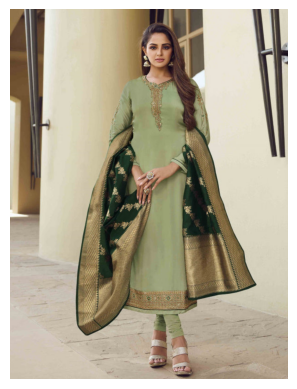

In [75]:
import os
from PIL import Image
import glob
import matplotlib.pyplot as plt

# Function to display the image
def display_img(file_path):
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Correct the path
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# List the files in the updated directory and filter for image files
#valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')  # Add other valid extensions if necessary
#image_paths_list = [f for f in os.listdir(extraction_directory_updated) if f.lower().endswith(valid_extensions)]

# directory path containing your images
image_directory = '/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

# Display the first image (if there's any valid image)
#if image_paths_list:
  #  first_img_path = os.path.join(extraction_directory_updated, image_paths_list[0])
 #   display_img(first_img_path)
#else:
   # print("No valid image files found.")

first_image_path = os.path.join(image_directory, image_paths_list[0])
display_image(first_image_path)


In [76]:
### generate list of file paths -- create a list of all image file paths 

In [77]:
#import glob

#img_directory = 'women_fashion/women fashion'

#img_paths_list = [file or file in glob.glob(os.path.json(img_directory, '*.*')) if file.endswith(('.jpeg', '.jpg', '.png', '.webp'))]

#print the list of img file paths
#print(img_paths_list)

In [78]:
### Feature extraction from images

In [79]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [80]:
### function to recommend images based on image features

In [95]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


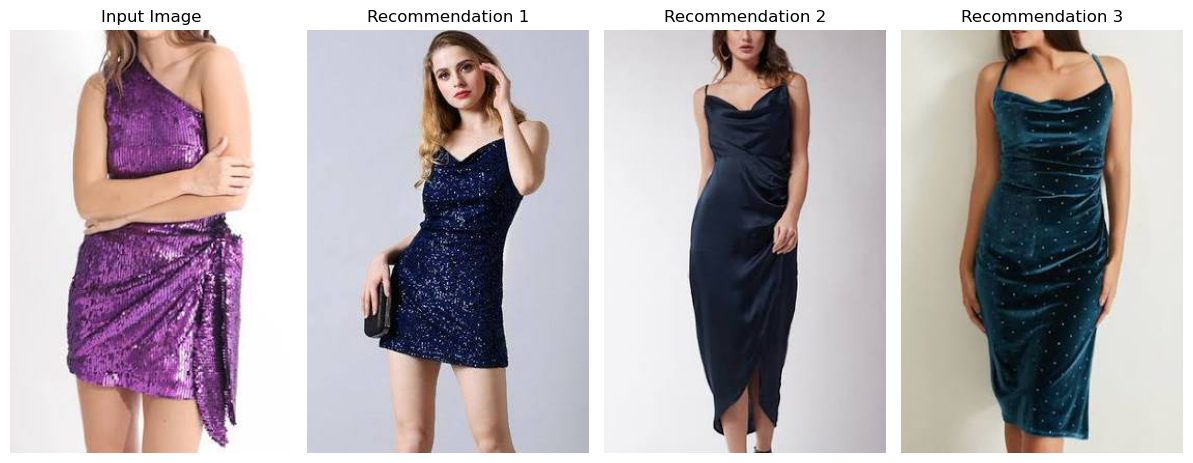

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


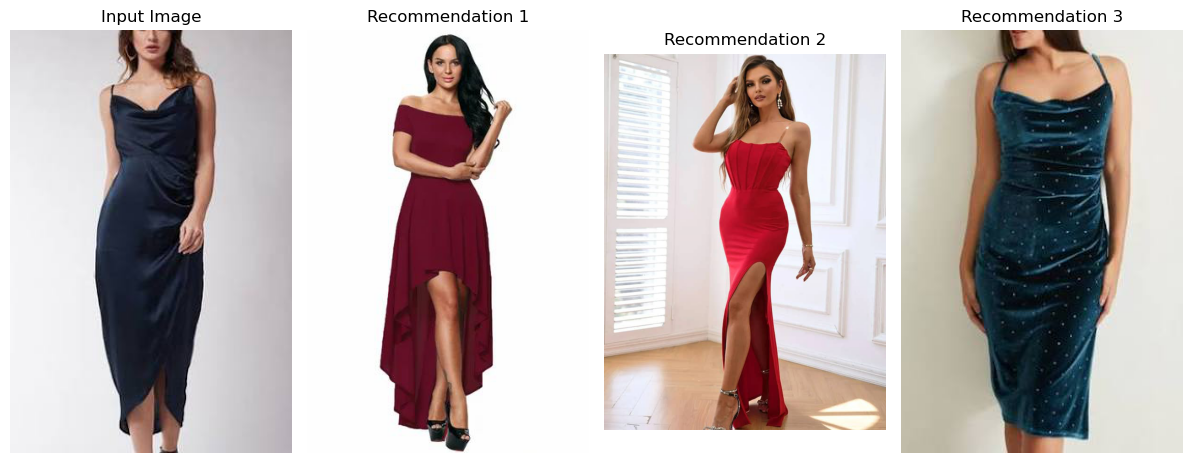

In [103]:
input_image_path = '/women_fashion/women fashion\\dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
input2 = '/women_fashion/women fashion\\shiny purple sequined dress with a one-shoulder design.jpg'
recommend_fashion_items_cnn(input2, all_features, image_paths_list, model, top_n =4)
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)